<a href="https://colab.research.google.com/github/denniss83/Perakende_Musteri_Analizi_ve_Segmentasyonu_2023_2024/blob/main/Perakende_M%C3%BC%C5%9Fteri_Analizi_ve_Segmentasyonu_(2023%E2%80%932024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perakende M√º≈üteri Analizi ve Segmentasyonu (2023‚Äì2024)

>‚ö†Ô∏è **Uyarƒ±:**
>**Bu √ßalƒ±≈üma yalnƒ±zca python ile veri analizi √∂ƒürenimi kapsamƒ±nda eƒüitim amacƒ±yla yapƒ±lmƒ±≈ütƒ±r. Ger√ßek bir kurumsal analizi temsil etmemektedir ve ticari kararlar i√ßin doƒürudan kullanƒ±lmamalƒ±dƒ±r.**

Bu projede, perakende satƒ±≈ülara ili≈ükin geni≈ü kapsamlƒ± bir m√º≈üteri veri seti analiz edilmi≈ütir.
√áalƒ±≈ümada m√º≈üteri demografisi, alƒ±≈üveri≈ü sƒ±klƒ±ƒüƒ±, toplam harcama, memnuniyet d√ºzeyi ve sipari≈ü durumu gibi √ße≈üitli deƒüi≈ükenler incelenmi≈ü; grafik destekli analizlerle m√º≈üteri profili ve davranƒ±≈ülarƒ± ortaya konmu≈ütur.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
plt.style.use("ggplot")

%matplotlib inline

# Veri Y√ºkleme

Google Colab ortamƒ±na `retail_data.csv` adlƒ± veri dosyasƒ± y√ºklenmi≈ütir. Bu veri seti, Kaggle platformu √ºzerinden elde edilmi≈ütir.

> üìÅ Veri Kaynaƒüƒ±:  
> https://www.kaggle.com/datasets/sahilprajapati143/retail-analysis-large-dataset


In [2]:
from google.colab import files
uploaded = files.upload()

Saving retail_data.csv to retail_data.csv


In [3]:
df = pd.read_csv("retail_data.csv")
df.head()

Transaction_ID  Customer_ID                 Name                Email  \
0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   

          Phone                      Address        City            State  \
0  1.414787e+09            3959 Amanda Burgs    Dortmund           Berlin   
1  6.852900e+09           82072 Dawn Centers  Nottingham          England   
2  8.362160e+09            4133 Young Canyon     Geelong  New South Wales   
3  2.776752e+09  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4  9.098268e+09    5813 Lori Ports Suite 269     Bristol          England   

   Zipcode    Country  ...  Total_Amount Product_Category  Product_Brand  \
0  77985.0    Germany  ...    324.086270         Clothing           Nike   
1  99071.0         UK  ...    806.707815      Electronics        Samsung   
2  75929.0  Australia  ...   1063.432799            Books  Penguin Books   
3  88420.0     Canada  ...   2466.854021       Home Decor     Home Depot   
4  48704.0         UK  ...    248.553049          Grocery         Nestle   

  Product_Type   Feedback  Shipping_Method Payment_Method Order_Status  \
0       Shorts  Excellent         Same-Day     Debit Card      Shipped   
1       Tablet  Excellent         Standard    Credit Card   Processing   
2   Children's    Average         Same-Day    Credit Card   Processing   
3        Tools  Excellent         Standard         PayPal   Processing   
4    Chocolate        Bad         Standard           Cash      Shipped   

   Ratings           products  
0      5.0     Cycling shorts  
1      4.0         Lenovo Tab  
2      2.0   Sports equipment  
3      4.0      Utility knife  
4      1.0  Chocolate cookies  

[5 rows x 30 columns]

###Veri Yapƒ±sƒ±

In [4]:
df.info()
print("\nSatƒ±r sayƒ±sƒ±:", df.shape[0])
print("S√ºtun sayƒ±sƒ±:", df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

### Eksik Deƒüer Kontrol√º

In [5]:
df.isnull().sum().sort_values(ascending=False)

Name                382
Phone               362
Total_Purchases     361
Date                359
Amount              357
Year                350
Time                350
Total_Amount        350
Email               347
Zipcode             340
Shipping_Method     337
Transaction_ID      333
Gender              317
Address             315
Customer_ID         308
Payment_Method      297
Income              290
Product_Category    283
State               281
Product_Brand       281
Month               273
Country             271
City                248
Order_Status        235
Customer_Segment    215
Ratings             184
Feedback            184
Age                 173
Product_Type          0
products              0
dtype: int64

### √ñzet ƒ∞statistikler

In [6]:
df.describe().T
df.describe(include='object').T

count  unique                   top    freq
Name              301628  159390         Michael Smith     144
Email             301663   52897   Michael59@gmail.com      93
Address           301695  299329  34070 Angela Islands       2
City              301762     130               Chicago   21652
State             301729      54               England   63059
Country           301739       5                   USA   95223
Gender            301693       2                  Male  187599
Income            301720       3                Medium  130230
Customer_Segment  301795       3               Regular  146221
Date              301651     366            11/22/2023     910
Month             301737      12                 April   41301
Time              301660   83677               2:16:01      14
Product_Category  301727       5           Electronics   71196
Product_Brand     301729      18                 Pepsi   30292
Product_Type      302010      33                 Water   24459
Feedback          301826       4             Excellent  100755
Shipping_Method   301673       3              Same-Day  104156
Payment_Method    301713       4           Credit Card   90116
Order_Status      301775       4             Delivered  130449
products          302010     318          Spring water    2508

### Benzersiz Deƒüer Sayƒ±sƒ±

In [7]:
df.nunique().sort_values(ascending=False)

Address             299329
Total_Amount        299305
Amount              299297
Phone               299295
Transaction_ID      294461
Name                159390
Zipcode              93978
Customer_ID          86766
Time                 83677
Email                52897
Date                   366
products               318
City                   130
State                   54
Age                     53
Product_Type            33
Product_Brand           18
Month                   12
Total_Purchases         10
Product_Category         5
Ratings                  5
Country                  5
Payment_Method           4
Feedback                 4
Order_Status             4
Income                   3
Shipping_Method          3
Customer_Segment         3
Gender                   2
Year                     2
dtype: int64

### Veri Temizliƒüi

In [8]:
df_clean = df.dropna()
df_clean["Year"] = df_clean["Year"].astype(int)
df_clean["Month"] = df_clean["Month"].astype("category")
df_clean["Gender"] = df_clean["Gender"].astype("category")
df_clean["Income"] = df_clean["Income"].astype("category")
df_clean["Customer_Segment"] = df_clean["Customer_Segment"].astype("category")

# Demografik Analiz ve G√∂rselle≈ütirme

Bu b√∂l√ºmde m√º≈üterilerin demografik √∂zellikleri incelenmi≈ü ve grafiklerle g√∂rselle≈ütirilmi≈ütir. √ñzellikle cinsiyet, gelir seviyesi ve segment daƒüƒ±lƒ±mlarƒ± detaylandƒ±rƒ±lmƒ±≈ütƒ±r.

## Cinsiyete G√∂re M√º≈üteri Daƒüƒ±lƒ±mƒ±

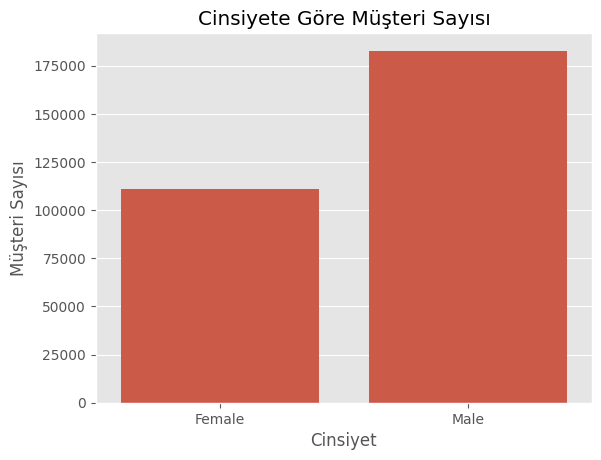

In [9]:
sns.countplot(data=df_clean, x="Gender")
plt.title("Cinsiyete G√∂re M√º≈üteri Sayƒ±sƒ±")
plt.xlabel("Cinsiyet")
plt.ylabel("M√º≈üteri Sayƒ±sƒ±")
plt.show()

## Gelir Seviyesine G√∂re Daƒüƒ±lƒ±m

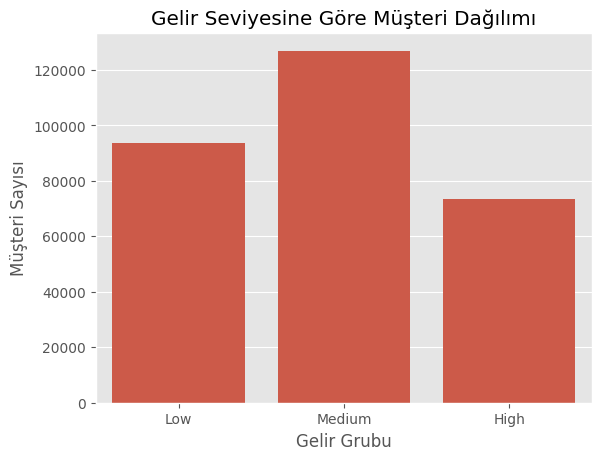

In [10]:
sns.countplot(data=df_clean, x="Income", order=["Low", "Medium", "High"])
plt.title("Gelir Seviyesine G√∂re M√º≈üteri Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Gelir Grubu")
plt.ylabel("M√º≈üteri Sayƒ±sƒ±")
plt.show()

## M√º≈üteri Segmentine G√∂re Daƒüƒ±lƒ±m

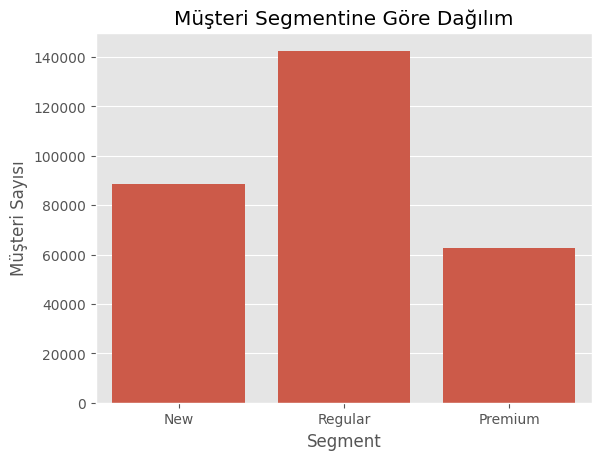

In [11]:
sns.countplot(data=df_clean, x="Customer_Segment", order=["New", "Regular", "Premium"])
plt.title("M√º≈üteri Segmentine G√∂re Daƒüƒ±lƒ±m")
plt.xlabel("Segment")
plt.ylabel("M√º≈üteri Sayƒ±sƒ±")
plt.show()

## Gelir Grubu ve Cinsiyet ƒ∞li≈ükisi

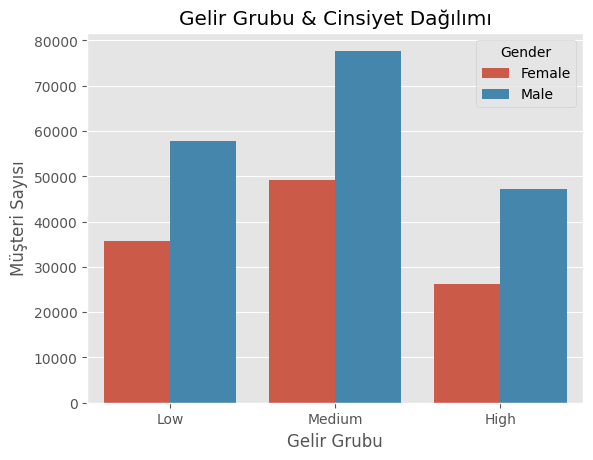

In [12]:
sns.countplot(data=df_clean, x="Income", hue="Gender", order=["Low", "Medium", "High"])
plt.title("Gelir Grubu & Cinsiyet Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Gelir Grubu")
plt.ylabel("M√º≈üteri Sayƒ±sƒ±")
plt.show()

## √úlkeye G√∂re M√º≈üteri Daƒüƒ±lƒ±mƒ±

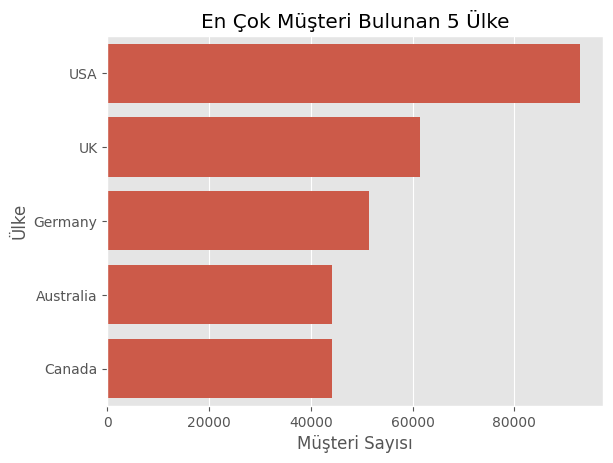

In [13]:
top_countries = df_clean['Country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("En √áok M√º≈üteri Bulunan 5 √úlke")
plt.xlabel("M√º≈üteri Sayƒ±sƒ±")
plt.ylabel("√úlke")
plt.show()

## Ya≈ü Daƒüƒ±lƒ±mƒ± (Histogram)

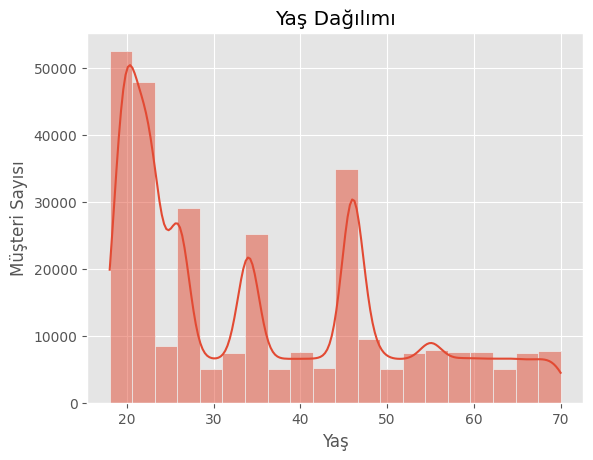

In [14]:
sns.histplot(df_clean['Age'], bins=20, kde=True)
plt.title("Ya≈ü Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Ya≈ü")
plt.ylabel("M√º≈üteri Sayƒ±sƒ±")
plt.show()

## Ya≈ü & Gelir Grubu Ortalamasƒ±

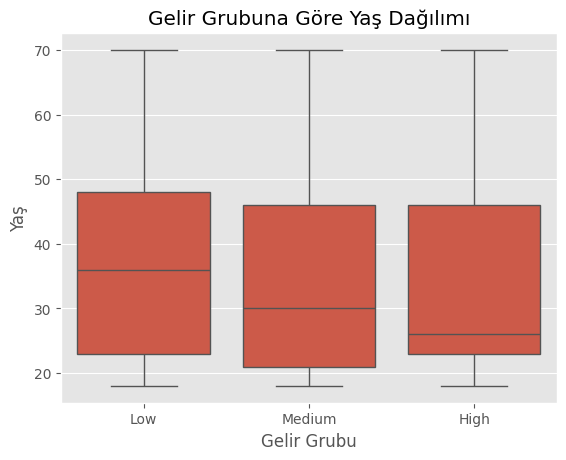

In [15]:
sns.boxplot(x="Income", y="Age", data=df_clean, order=["Low", "Medium", "High"])
plt.title("Gelir Grubuna G√∂re Ya≈ü Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Gelir Grubu")
plt.ylabel("Ya≈ü")
plt.show()

## Segmentlere G√∂re Ortalama Ya≈ü ve Harcama

In [16]:
df_clean.groupby("Customer_Segment")[["Age", "Total_Amount"]].mean().round(2)

Age  Total_Amount
Customer_Segment                     
New               35.83       1367.95
Premium           41.61       1363.84
Regular           32.54       1369.21

# Satƒ±n Alma Davranƒ±≈ülarƒ±
Bu b√∂l√ºmde m√º≈üterilerin alƒ±≈üveri≈ü yapma bi√ßimleri incelenmi≈ütir. Hangi m√º≈üteri segmentlerinin daha fazla harcama yaptƒ±ƒüƒ± ve hangi m√º≈üterilerin en sƒ±k alƒ±≈üveri≈ü yaptƒ±ƒüƒ± analiz edilmi≈ütir.

## En √áok Harcayan M√º≈üteri Segmenti

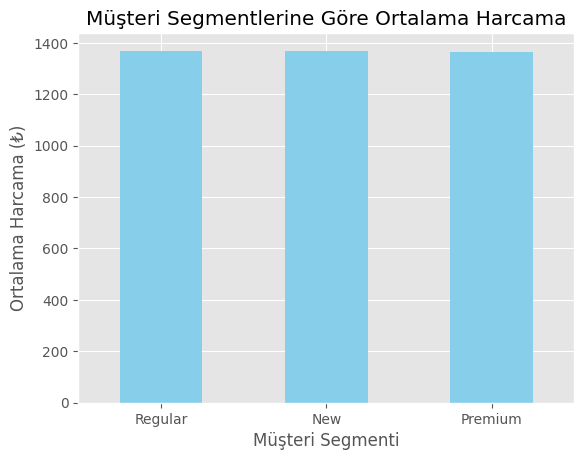

In [17]:
df_clean.groupby("Customer_Segment")["Total_Amount"].mean().sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("M√º≈üteri Segmentlerine G√∂re Ortalama Harcama")
plt.ylabel("Ortalama Harcama (‚Ç∫)")
plt.xlabel("M√º≈üteri Segmenti")
plt.xticks(rotation=0)
plt.show()

## En Sƒ±k Alƒ±≈üveri≈ü Yapan 10 M√º≈üteri

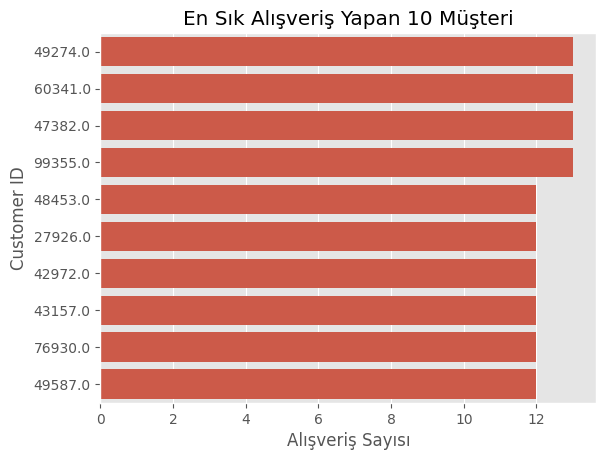

In [18]:
freq_df = df_clean.groupby("Customer_ID").size().reset_index(name="Transaction_Count")

top_freq = freq_df.sort_values(by="Transaction_Count", ascending=False).head(10)

sns.barplot(y=top_freq["Customer_ID"].astype(str), x=top_freq["Transaction_Count"])
plt.title("En Sƒ±k Alƒ±≈üveri≈ü Yapan 10 M√º≈üteri")
plt.xlabel("Alƒ±≈üveri≈ü Sayƒ±sƒ±")
plt.ylabel("Customer ID")
plt.show()

## En Fazla √úr√ºn Satƒ±n Alan 10 M√º≈üteri

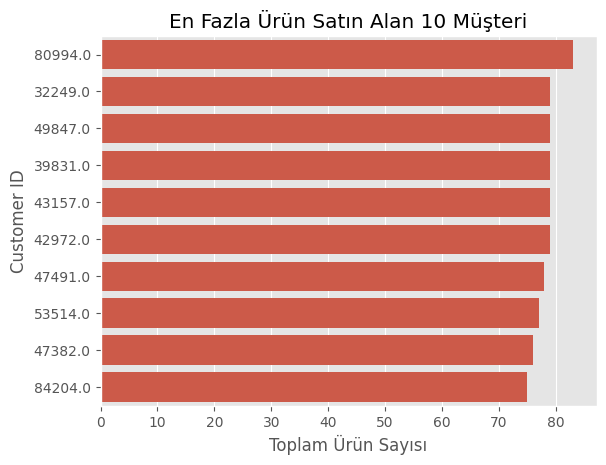

In [19]:
purchase_df = df_clean.groupby("Customer_ID")["Total_Purchases"].sum().reset_index()

top_purchase = purchase_df.sort_values(by="Total_Purchases", ascending=False).head(10)

sns.barplot(y=top_purchase["Customer_ID"].astype(str), x=top_purchase["Total_Purchases"])
plt.title("En Fazla √úr√ºn Satƒ±n Alan 10 M√º≈üteri")
plt.xlabel("Toplam √úr√ºn Sayƒ±sƒ±")
plt.ylabel("Customer ID")
plt.show()

## √úr√ºn Kategorilerine G√∂re Toplam Harcama

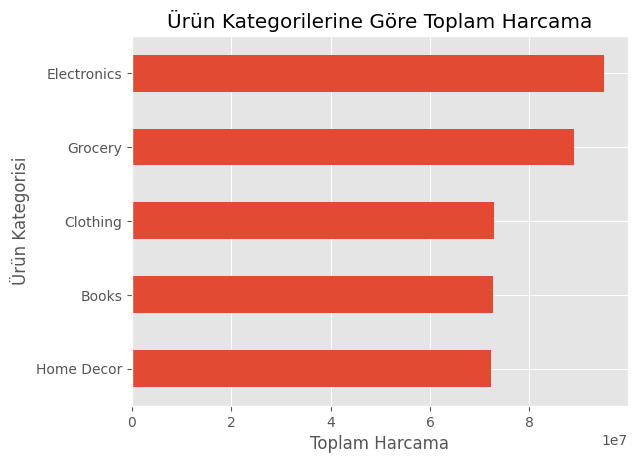

In [20]:
df_clean.groupby("Product_Category")["Total_Amount"].sum().sort_values().plot(kind="barh")
plt.title("√úr√ºn Kategorilerine G√∂re Toplam Harcama")
plt.xlabel("Toplam Harcama")
plt.ylabel("√úr√ºn Kategorisi")
plt.show()

## En √áok Tercih Edilen √úr√ºn T√ºrleri

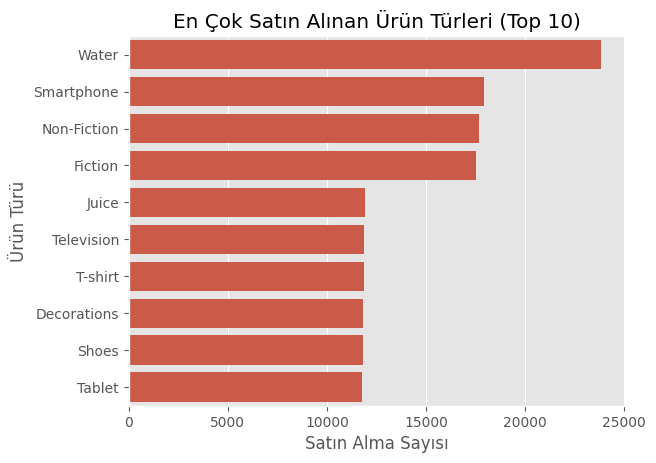

In [21]:
top_products = df_clean["Product_Type"].value_counts().nlargest(10)
sns.barplot(y=top_products.index, x=top_products.values)
plt.title("En √áok Satƒ±n Alƒ±nan √úr√ºn T√ºrleri (Top 10)")
plt.xlabel("Satƒ±n Alma Sayƒ±sƒ±")
plt.ylabel("√úr√ºn T√ºr√º")
plt.show()

## En √áok Kullanƒ±lan √ñdeme Y√∂ntemleri

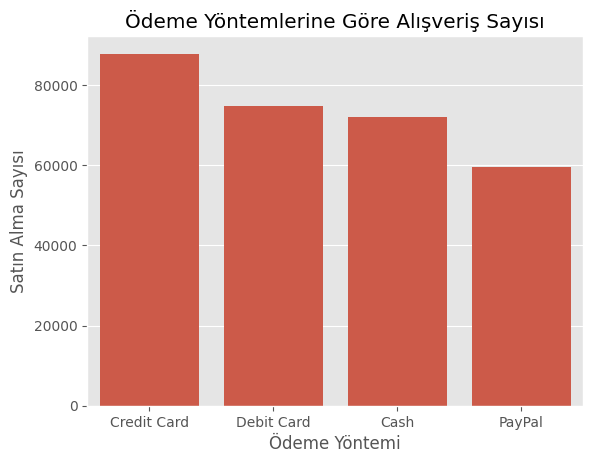

In [22]:
sns.countplot(data=df_clean, x="Payment_Method", order=df_clean["Payment_Method"].value_counts().index)
plt.title("√ñdeme Y√∂ntemlerine G√∂re Alƒ±≈üveri≈ü Sayƒ±sƒ±")
plt.xlabel("√ñdeme Y√∂ntemi")
plt.ylabel("Satƒ±n Alma Sayƒ±sƒ±")
plt.show()

# M√º≈üteri Memnuniyeti ve Geri Bildirim Analizi
Bu b√∂l√ºmde m√º≈üterilerin √ºr√ºn ve hizmet deneyimlerine ili≈ükin geri bildirimleri analiz edilmi≈ütir. Feedback ve Ratings s√ºtunlarƒ± kullanƒ±larak genel memnuniyet d√ºzeyi ve puan daƒüƒ±lƒ±mlarƒ± g√∂rselle≈ütirilmi≈ütir.

## Geri Bildirim (Feedback) Daƒüƒ±lƒ±mƒ±

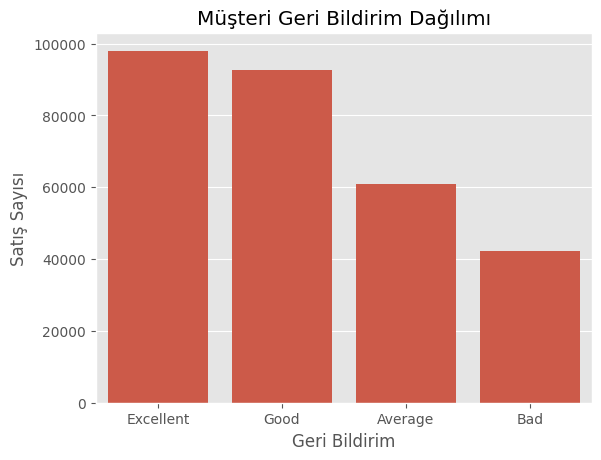

In [24]:
sns.countplot(data=df_clean, x="Feedback", order=df_clean["Feedback"].value_counts().index)
plt.title("M√º≈üteri Geri Bildirim Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Geri Bildirim")
plt.ylabel("Satƒ±≈ü Sayƒ±sƒ±")
plt.show()

## Puanlara (Ratings) G√∂re Geri Bildirim Ortalamasƒ±

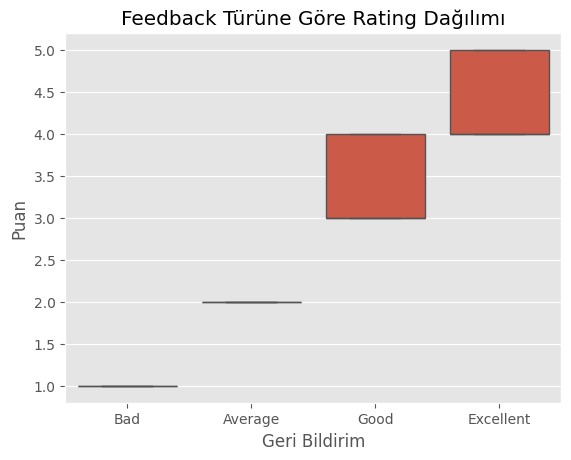

In [25]:
sns.boxplot(x="Feedback", y="Ratings", data=df_clean, order=["Bad", "Average", "Good", "Excellent"])
plt.title("Feedback T√ºr√ºne G√∂re Rating Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Geri Bildirim")
plt.ylabel("Puan")
plt.show()

## Marka ve Memnuniyet ƒ∞li≈ükisi (Top 5 Marka)

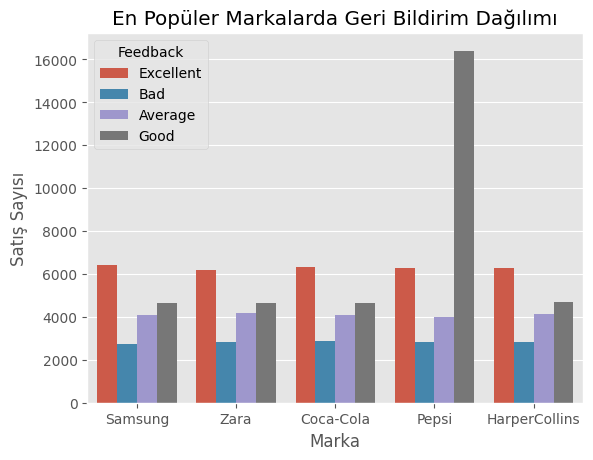

In [26]:
top_brands = df_clean["Product_Brand"].value_counts().nlargest(5).index
brand_feedback = df_clean[df_clean["Product_Brand"].isin(top_brands)]

sns.countplot(data=brand_feedback, x="Product_Brand", hue="Feedback")
plt.title("En Pop√ºler Markalarda Geri Bildirim Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Marka")
plt.ylabel("Satƒ±≈ü Sayƒ±sƒ±")
plt.legend(title="Feedback")
plt.show()

## Ortalama Puanlara G√∂re En ƒ∞yi 10 √úr√ºn T√ºr√º

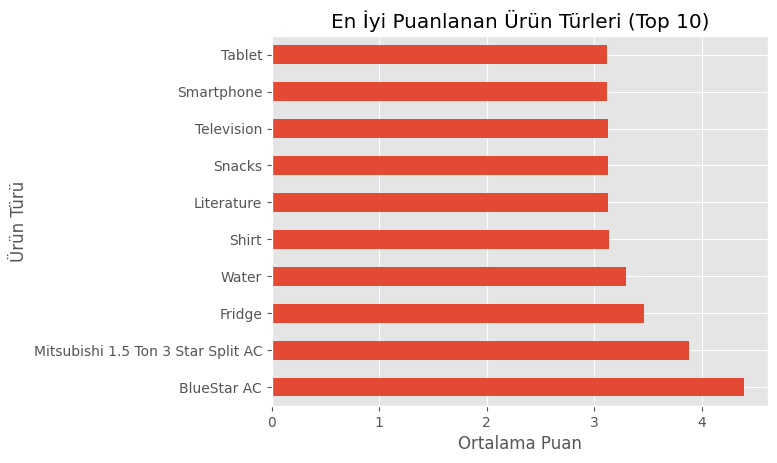

In [27]:
df_clean.groupby("Product_Type")["Ratings"].mean().sort_values(ascending=False).head(10).plot(kind="barh")
plt.title("En ƒ∞yi Puanlanan √úr√ºn T√ºrleri (Top 10)")
plt.xlabel("Ortalama Puan")
plt.ylabel("√úr√ºn T√ºr√º")
plt.show()

# Zaman Serisi ve Trend Analizi
Bu b√∂l√ºmde yƒ±llara ve aylara g√∂re toplam satƒ±≈ü miktarlarƒ± incelenmi≈ü, zaman i√ßerisindeki satƒ±≈ü eƒüilimleri analiz edilmi≈ütir. Ama√ß, mevsimsellik ve yƒ±llƒ±k deƒüi≈üimleri ortaya koymaktƒ±r.

## Yƒ±llara G√∂re Toplam Satƒ±≈ü Miktarƒ±

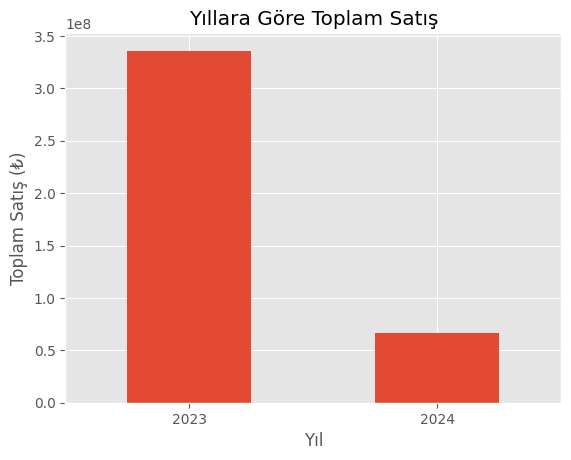

In [28]:
df_clean.groupby("Year")["Total_Amount"].sum().plot(kind="bar")
plt.title("Yƒ±llara G√∂re Toplam Satƒ±≈ü")
plt.xlabel("Yƒ±l")
plt.ylabel("Toplam Satƒ±≈ü (‚Ç∫)")
plt.xticks(rotation=0)
plt.show()

## Aylara G√∂re Toplam Satƒ±≈ü

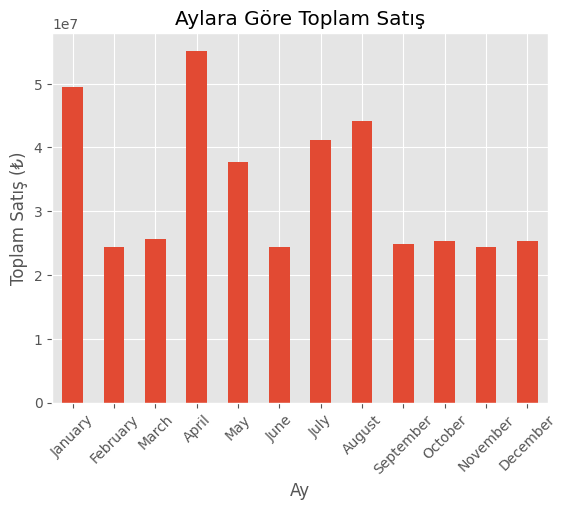

In [29]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df_clean.groupby("Month")["Total_Amount"].sum().reindex(month_order).plot(kind="bar")
plt.title("Aylara G√∂re Toplam Satƒ±≈ü")
plt.xlabel("Ay")
plt.ylabel("Toplam Satƒ±≈ü (‚Ç∫)")
plt.xticks(rotation=45)
plt.show()

## Yƒ±l & Ay Bazlƒ± Isƒ± Haritasƒ± (Heatmap)

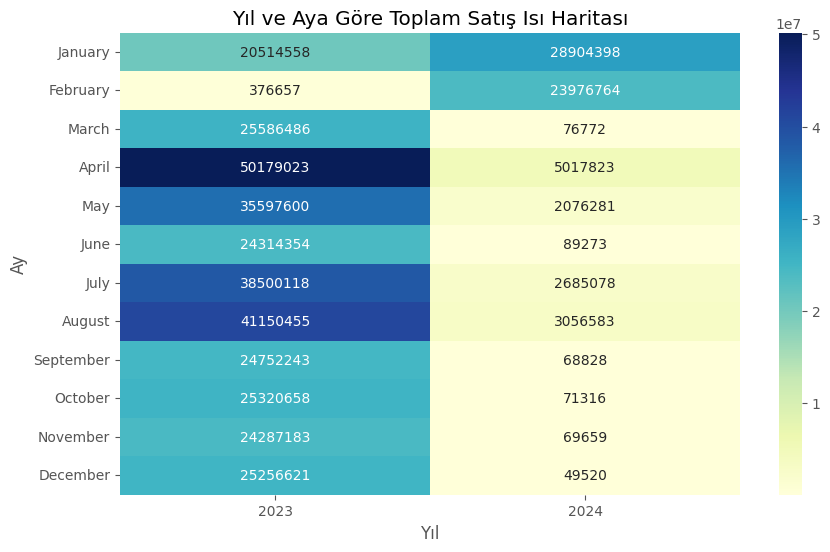

In [30]:
pivot = df_clean.pivot_table(values="Total_Amount", index="Month", columns="Year", aggfunc="sum")
pivot = pivot.reindex(month_order)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Yƒ±l ve Aya G√∂re Toplam Satƒ±≈ü Isƒ± Haritasƒ±")
plt.xlabel("Yƒ±l")
plt.ylabel("Ay")
plt.show()

## Aylƒ±k Ortalama Satƒ±≈ü Trendi (T√ºm Yƒ±llar Ortalamasƒ±)

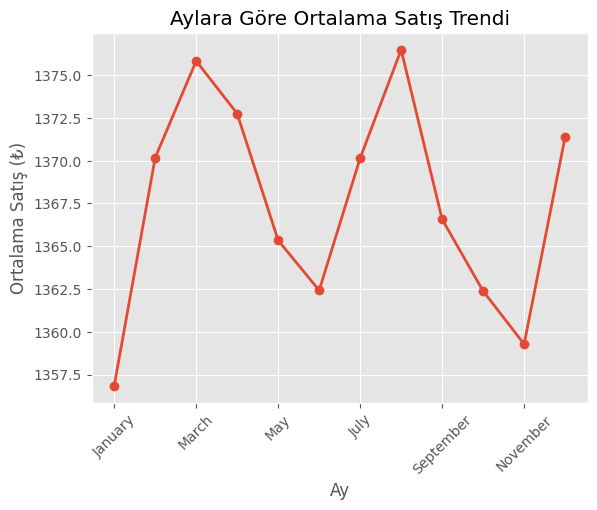

In [31]:
monthly_avg = df_clean.groupby("Month")["Total_Amount"].mean().reindex(month_order)

monthly_avg.plot(marker="o", linewidth=2)
plt.title("Aylara G√∂re Ortalama Satƒ±≈ü Trendi")
plt.xlabel("Ay")
plt.ylabel("Ortalama Satƒ±≈ü (‚Ç∫)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Kargo Y√∂ntemi ve Sipari≈ü Durumu Analizi
Bu b√∂l√ºmde sipari≈ülerin durumlarƒ± (Order_Status) ve her bir durumun ortalama harcama deƒüerleri incelenmi≈ütir. Hangi t√ºr sipari≈ülerin daha yaygƒ±n olduƒüu ve ne kadar harcama ile sonu√ßlandƒ±ƒüƒ± analiz edilmi≈ütir.

## Sipari≈ü Durumu Daƒüƒ±lƒ±mƒ± (Order_Status)

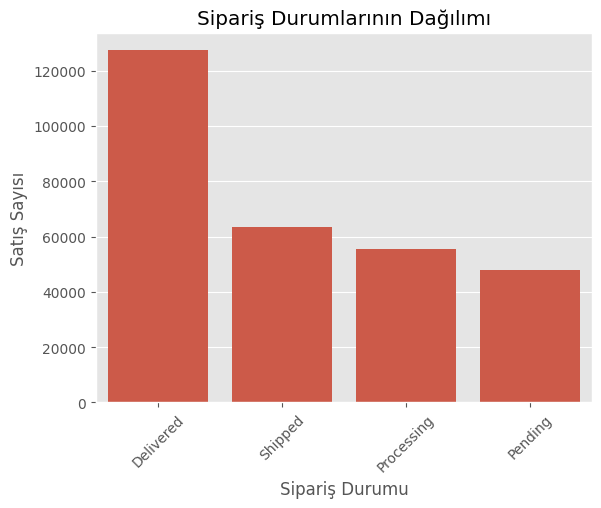

In [32]:
sns.countplot(data=df_clean, x="Order_Status", order=df_clean["Order_Status"].value_counts().index)
plt.title("Sipari≈ü Durumlarƒ±nƒ±n Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Sipari≈ü Durumu")
plt.ylabel("Satƒ±≈ü Sayƒ±sƒ±")
plt.xticks(rotation=45)
plt.show()

## Sipari≈ü Durumuna G√∂re Ortalama Harcama


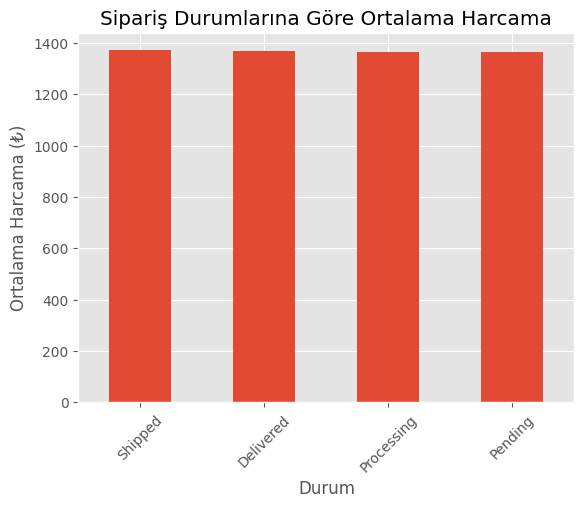

In [33]:
df_clean.groupby("Order_Status")["Total_Amount"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Sipari≈ü Durumlarƒ±na G√∂re Ortalama Harcama")
plt.xlabel("Durum")
plt.ylabel("Ortalama Harcama (‚Ç∫)")
plt.xticks(rotation=45)
plt.show()

## Kargo Y√∂ntemi & Sipari≈ü Durumu ƒ∞li≈ükisi

In [34]:
pd.crosstab(df_clean["Shipping_Method"], df_clean["Order_Status"], normalize='index').round(2).style.background_gradient(cmap="YlGnBu")

## "Pending‚Äù Oranƒ± En Y√ºksek Kargo Y√∂ntemleri

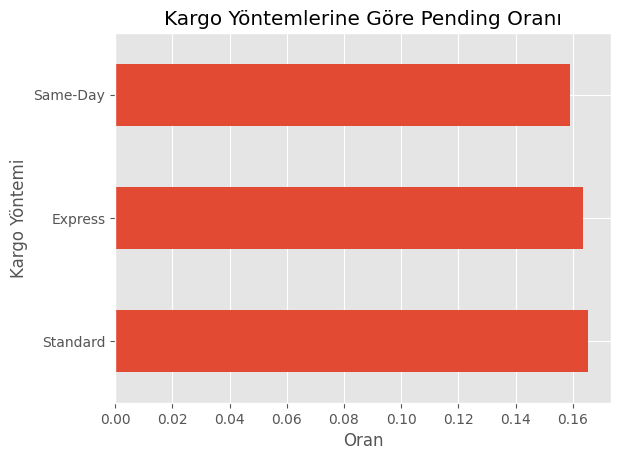

In [36]:
pending_rates = pd.crosstab(df_clean["Shipping_Method"], df_clean["Order_Status"], normalize='index')
pending_rates["Pending"].sort_values(ascending=False).plot(kind="barh")
plt.title("Kargo Y√∂ntemlerine G√∂re Pending Oranƒ±")
plt.xlabel("Oran")
plt.ylabel("Kargo Y√∂ntemi")
plt.show()

## ‚ÄúDelivered‚Äù ve ‚ÄúShipped‚Äù Oranlarƒ± Zamanla Deƒüi≈üiyor mu?

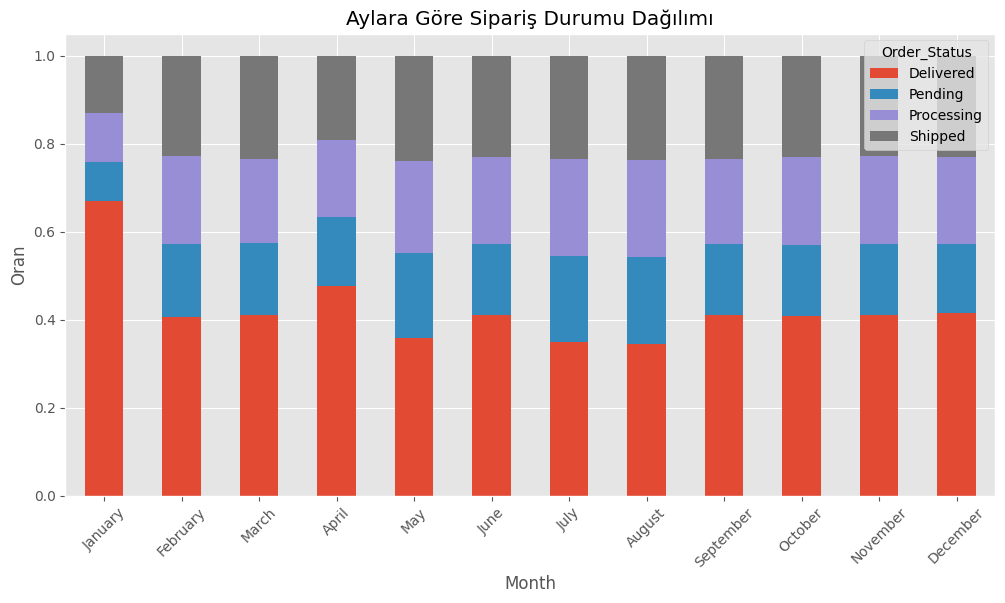

In [37]:
status_by_month = pd.crosstab(df_clean["Month"], df_clean["Order_Status"], normalize="index")
status_by_month.loc[["January", "February", "March", "April", "May", "June",
                     "July", "August", "September", "October", "November", "December"]
                   ].plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Aylara G√∂re Sipari≈ü Durumu Daƒüƒ±lƒ±mƒ±")
plt.ylabel("Oran")
plt.xticks(rotation=45)
plt.show()